In [1]:
#add project root to python path
import sys
sys.path.append('..')

In [2]:
import os
import cv2
import pathlib
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
path_to_dataset = pathlib.Path('../generated/lfw/')
file_paths = list(path_to_dataset.rglob('*.jpg'))

#function to convert BGR to RGB for matplotlib display
get_rgb_from_bgr = lambda bgr_img: cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)

In [4]:
print (f"Number of images in the dataset: {len(file_paths)}")

Number of images in the dataset: 13233


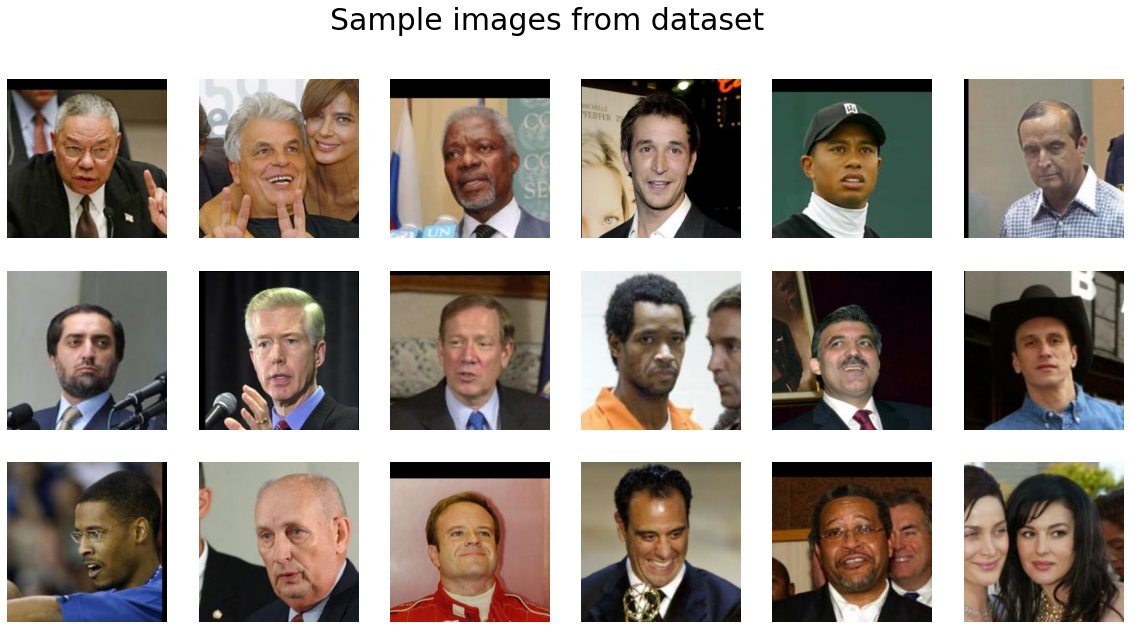

In [5]:
random.seed(42)

n_rows = 3
n_cols = 6

fig = plt.figure(figsize = (20, 10))


for i in range(n_rows * n_cols):
    sample_path = random.sample(file_paths, 1)[0]
    img = cv2.imread(str(sample_path))
    
    ax = fig.add_subplot(n_rows, n_cols, i + 1)
    ax.imshow(get_rgb_from_bgr(img))
    ax.axis('off')
    
plt.suptitle('Sample images from dataset', fontsize = 30);

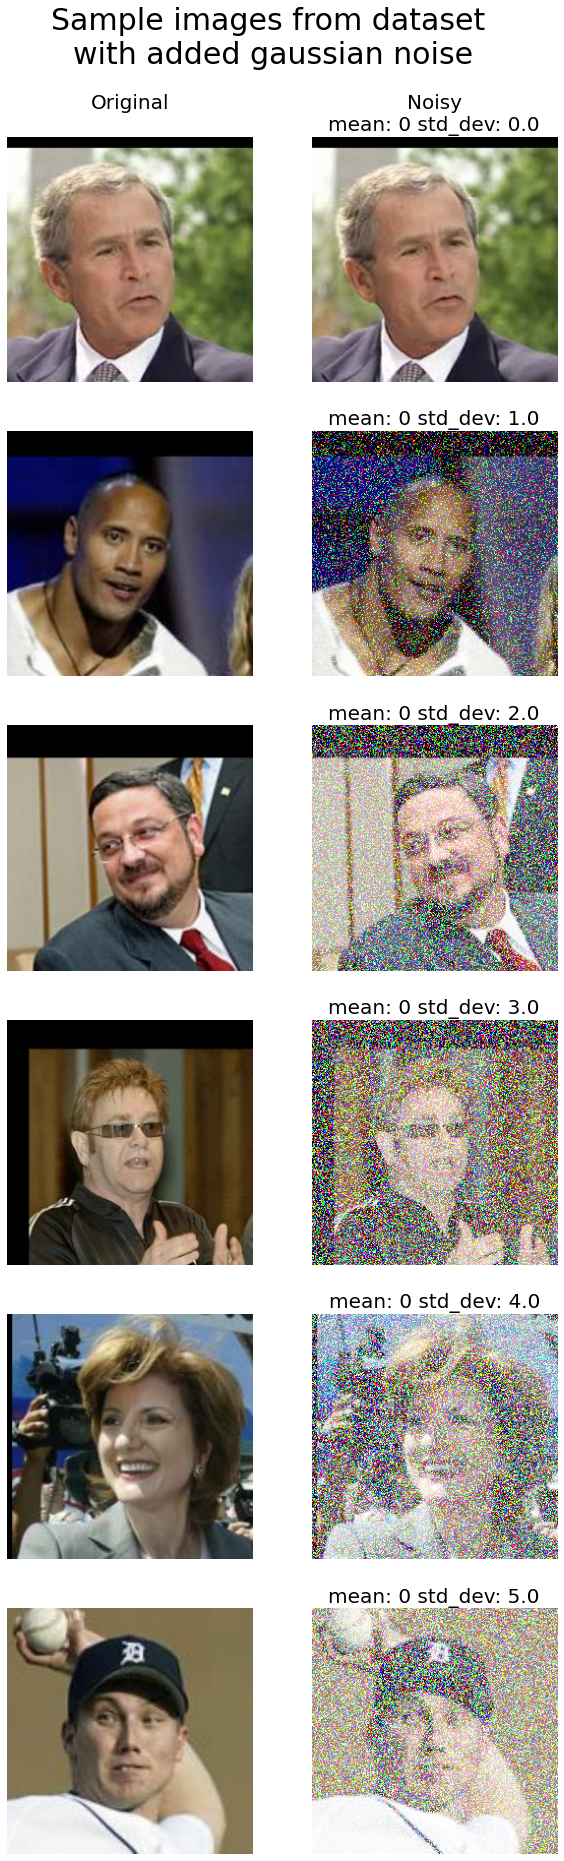

In [6]:
random.seed(12)

n_rows = 6
n_cols = 2

fig = plt.figure(figsize = (10, 30))


for i in range(0, n_rows * n_cols, 2):
    sample_path = random.sample(file_paths, 1)[0]
    img = cv2.imread(str(sample_path))
    
    ax = fig.add_subplot(n_rows, n_cols, i + 1)
    ax.imshow(get_rgb_from_bgr(img))
    ax.axis('off')
    
    if i == 0:
        ax.set_title('Original\n', fontsize = 20)
    
    mean = 0
    std_dev = i / 2
    noisy = cv2.add(img, np.random.normal(mean, std_dev, img.shape).astype('uint8'))
    
    ax = fig.add_subplot(n_rows, n_cols, i + 2)
    ax.imshow(get_rgb_from_bgr(noisy))
    ax.axis('off')
    
    if i == 0:
        ax.set_title(f'Noisy\nmean: {mean} std_dev: {std_dev}', fontsize = 20)
    else:
        ax.set_title(f'mean: {mean} std_dev: {std_dev}', fontsize = 20)
        
plt.suptitle('Sample images from dataset \nwith added gaussian noise', fontsize = 30);
fig.subplots_adjust(top=0.92)

## We observe that we can control the intensity of the gaussian noise by keeping *mean* constant and varying the *std_dev*, it could be interesting to increase the intensity of the noise gradually as the training progresses and see if it leads to better training